In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_theme(style="whitegrid")
from IPython.display import display, Markdown
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
test_training_1_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/predictions data all/future_test_1/predictions_list.csv"))
test_training_2_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/predictions data all/future_test_2/predictions_list.csv"))
test_training_3_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/predictions data all/future_test_3/predictions_list.csv"))
test_training_4_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/predictions data all/future_test_4/predictions_list.csv"))
test_training_5_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/prediction_list_test_training_5_20170101_20210930.csv"))
test_training_6_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/prediction_list_test_training_6_20170101_20210930.csv"))
test_training_7_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/prediction_list_test_training_7_20170101_20210331.csv"))
test_training_8_predictions = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/prediction_list_test_training_8_20170101_20210331.csv"))

In [3]:
real_values = pd.read_excel(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa/TESTS PHASE 3/Demanda_maestro.xlsx"), sheet_name="Real")

In [14]:
areas_subareas = pd.read_csv(os.path.join("C:/Users/Anakim/Documents/datasets/tebsa", "AREAS_SUBAREAS.csv"))

In [15]:
areas_subareas

AREAS      SUBAREAS  IS_CONSUMER
0          CENTRO       Codensa        False
1          CENTRO          Meta        False
2          CENTRO      Rubiales         True
3          CENTRO      Guaviare        False
4    COSTA_CARIBE       Bolivar        False
5    COSTA_CARIBE   TubosCaribe         True
6    COSTA_CARIBE       Planeta        False
7    COSTA_CARIBE  CordobaSucre        False
8    COSTA_CARIBE   Cerromatoso         True
9    COSTA_CARIBE     Atlantico        False
10   COSTA_CARIBE           GCM        False
11   COSTA_CARIBE      Intercor         True
12   COSTA_CARIBE      Drummond         True
13        NORESTE     Antioquia        False
14        NORESTE         Choco        False
15        ORIENTE  NorSantander        False
16        ORIENTE        Boyaca        False
17        ORIENTE        Arauca        False
18        ORIENTE           Oxy         True
19        ORIENTE      Casanare        False
20        ORIENTE     Santander        False
21        ORIENTE   CiraInfanta         True
22          VALLE          Cali        False
23          VALLE       Cartago        False
24          VALLE        Celsia        False
25          VALLE         Tulua        False
26            CQR        Caldas        False
27            CQR       Quindio        False
28            CQR       Pereira        False
29  TOLIMA_GRANDE       Caqueta        False
30  TOLIMA_GRANDE         Huila        False
31  TOLIMA_GRANDE        Tolima        False
32            SUR  BajoPutumayo        False
33            SUR        Nariño        False
34            SUR          Emec        False
35            SUR      Putumayo        False
36            SUR         Cauca        False

In [16]:
areas_subareas.rename(columns={'AREAS':'AREA','SUBAREAS':'SUBAREA'},inplace=True)

In [17]:
areas_subareas.loc[areas_subareas['AREA'] == 'COSTA_CARIBE', 'AREA'] = 'CARIBE' 

In [18]:
areas_subareas['AREA'] = areas_subareas['AREA'].map(lambda x: x.lower())

In [19]:
areas_subareas["SUBAREA"] = areas_subareas["SUBAREA"].map(lambda x: x.lower()) 

In [20]:
areas_subareas

AREA       SUBAREA  IS_CONSUMER
0          centro       codensa        False
1          centro          meta        False
2          centro      rubiales         True
3          centro      guaviare        False
4          caribe       bolivar        False
5          caribe   tuboscaribe         True
6          caribe       planeta        False
7          caribe  cordobasucre        False
8          caribe   cerromatoso         True
9          caribe     atlantico        False
10         caribe           gcm        False
11         caribe      intercor         True
12         caribe      drummond         True
13        noreste     antioquia        False
14        noreste         choco        False
15        oriente  norsantander        False
16        oriente        boyaca        False
17        oriente        arauca        False
18        oriente           oxy         True
19        oriente      casanare        False
20        oriente     santander        False
21        oriente   cirainfanta         True
22          valle          cali        False
23          valle       cartago        False
24          valle        celsia        False
25          valle         tulua        False
26            cqr        caldas        False
27            cqr       quindio        False
28            cqr       pereira        False
29  tolima_grande       caqueta        False
30  tolima_grande         huila        False
31  tolima_grande        tolima        False
32            sur  bajoputumayo        False
33            sur        nariño        False
34            sur          emec        False
35            sur      putumayo        False
36            sur         cauca        False

In [40]:
real_values.columns[2:]

Index(['Hora', 'Caqueta', 'Antioquia', 'Atlantico', 'BajoPutumayo', 'Cali',
       'Bolivar', 'Cartago', 'Nariño', 'NorSantander', 'Cerromatoso', 'Caldas',
       'Choco', 'CiraInfanta', 'Codensa', 'cundinamarca', 'Drummond', 'Boyaca',
       'Emec', 'Meta', 'Arauca', 'Casanare', 'Guaviare', 'Intercor', 'Oxy',
       'Huila', 'Celsia', 'Pereira', 'Tolima', 'Planeta', 'Putumayo',
       'Quindio', 'Rubiales', 'Santander', 'CordobaSucre', 'Cauca', 'GCM',
       'Tulua', 'TubosCaribe'],
      dtype='object')

In [27]:
real_values[["Fecha", "Hora", "Nariño"]].head()

Fecha  Hora  Nariño
0 2017-01-01     1   94.24
1 2017-01-01     2   85.28
2 2017-01-01     3   75.57
3 2017-01-01     4   69.03
4 2017-01-01     5   64.62

In [34]:
real_values.loc[real_values["Fecha"] >= "2022-02-01"][["Nariño", "Atlantico"]]

Nariño  Atlantico
44568   62.664105  682.58548
44569   59.152639  660.65152
44570   57.544081  640.89339
44571   57.194950  625.02635
44572   60.558900  618.27072
...           ...        ...
45979  117.895523  762.52177
45980  120.191480  768.45023
45981  110.174450  775.44902
45982   91.386110  769.53738
45983   74.626032  743.68994

[1416 rows x 2 columns]

In [65]:
test = real_values.loc[real_values["Fecha"] >= "2022-02-01"][["Fecha", "Hora", "nariño", "atlantico"]].sort_values(by=["Fecha", "Hora"])[["nariño", "atlantico"]].sum(axis="columns")

In [67]:
test.values

array([745.249585  , 719.80415889, 698.43747139, ..., 885.62347   ,
       860.92349   , 818.31597167])

In [38]:
test_training_1_predictions.head()

Unnamed: 0   antioquia     arauca   atlantico  bajoputumayo     bolivar  \
0           0  821.658752  25.415272  676.657898      6.971313  433.038483   
1           1  824.796997  25.516388  671.027222      6.829464  424.181366   
2           2  819.299011  25.717463  666.315491      6.676109  411.237976   
3           3  821.441528  26.003475  657.444519      6.901310  400.919769   
4           4  823.950562  26.614666  638.823120      7.315460  385.646484   

       boyaca      caldas        cali    caqueta  ...     pereira    planeta  \
0  196.120041  156.513687  378.356567  32.958076  ...   61.638443  40.820000   
1  196.378311  156.192749  382.859650  33.038094  ...  205.525436  40.276157   
2  196.783768  156.159302  387.180786  32.534985  ...  172.568008  37.411053   
3  198.386978  157.834213  390.779205  32.896198  ...  172.568008  34.222424   
4  202.666626  161.675034  395.402710  33.524517  ...   73.548531  34.413692   

    putumayo    quindio    rubiales   santander      tolima  tuboscaribe  \
0   9.872980  52.690971  142.883392  285.417236  188.296860     2.191703   
1  10.018660  51.047539  142.778519  278.531647  182.594955     2.191703   
2   9.974905  49.027969  142.667343  271.999481  178.489227     2.191703   
3  10.021433  48.440369  142.578476  264.602509  175.683945     2.191703   
4  10.163589  49.245167  142.539139  260.790863  173.645218     2.191703   

       tulua         pais  
0  26.318562  6998.753485  
1  26.318562  7088.045430  
2  26.318562  6954.910274  
3  26.318562  6901.601103  
4  26.318562  6751.477288  

[5 rows x 39 columns]

In [5]:
real_values.rename(columns={current_name : current_name.lower() for current_name in real_values.columns[2:]}, inplace=True)

In [14]:
import datetime

In [59]:
tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}")

44568    2022-02-01 00
44569    2022-02-01 01
44570    2022-02-01 02
44571    2022-02-01 03
44572    2022-02-01 04
             ...      
45979    2022-03-31 19
45980    2022-03-31 20
45981    2022-03-31 21
45982    2022-03-31 22
45983    2022-03-31 23
Length: 1416, dtype: object

In [63]:
pd.to_datetime(tmp.FECHA  + " " + tmp.HORA.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')

0   2020-10-26 00:00:00
1   2020-10-26 01:00:00
2   2020-10-26 02:00:00
3   2020-10-26 03:00:00
4   2020-10-26 04:00:00
dtype: datetime64[ns]

In [74]:
real_values.loc[(real_values["Fecha"] >= "2022-02-01")&(real_values["Fecha"] <= "2022-02-28")].shape

(672, 40)

## Graphs by Subarea 

### FEB Predictions

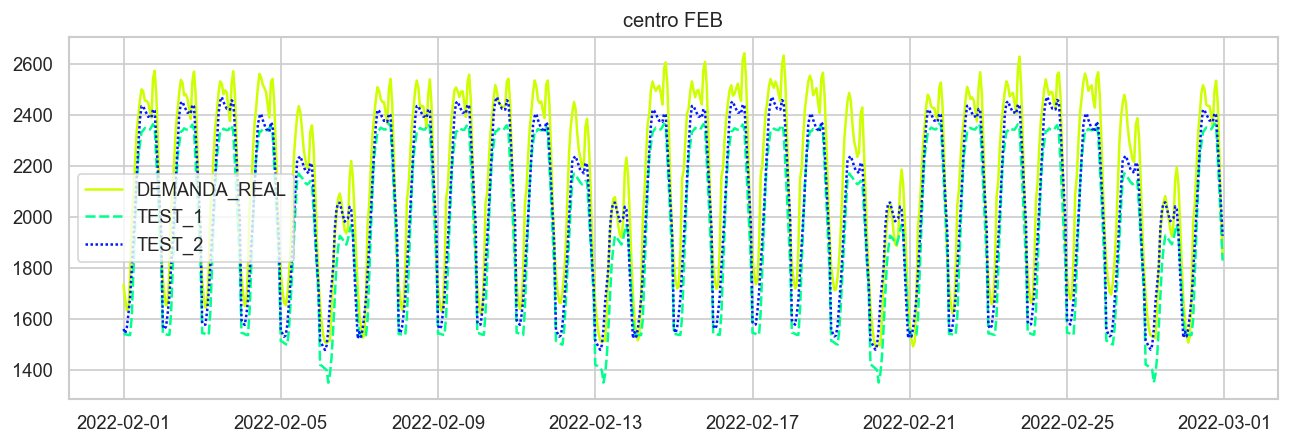

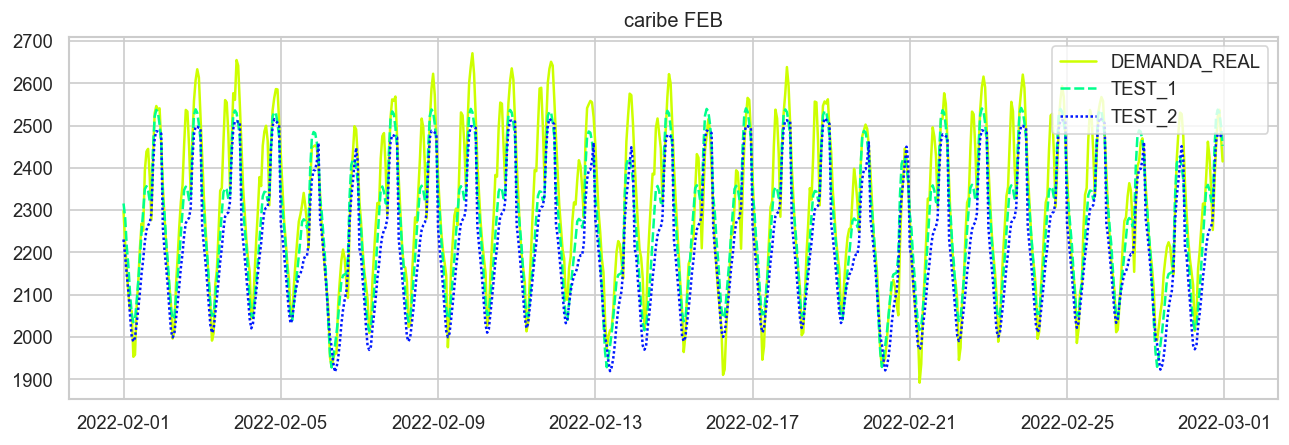

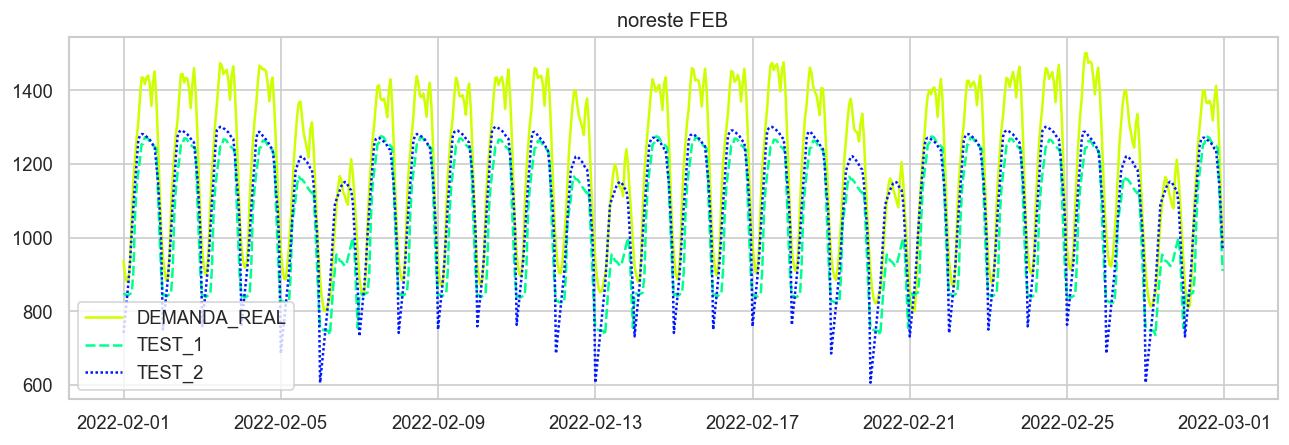

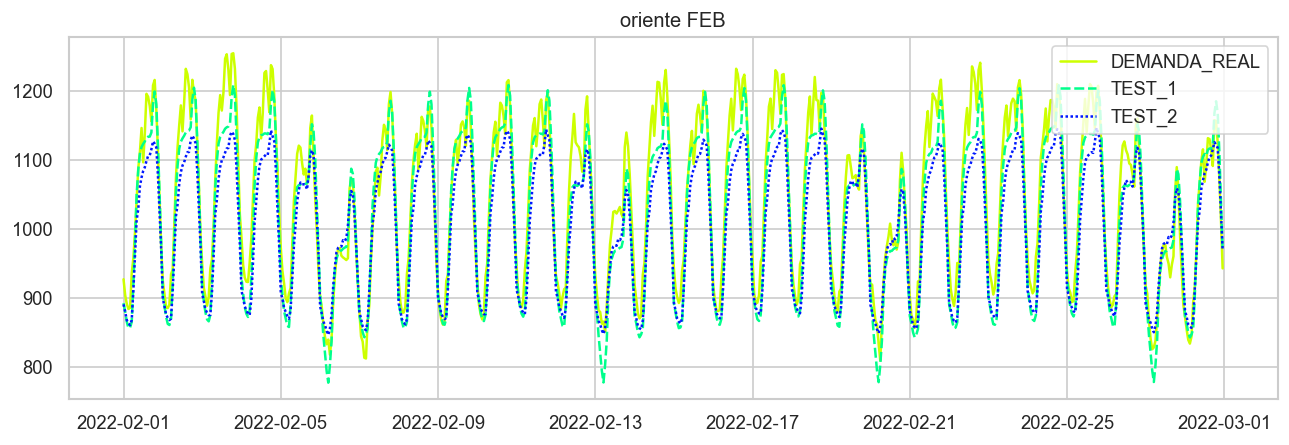

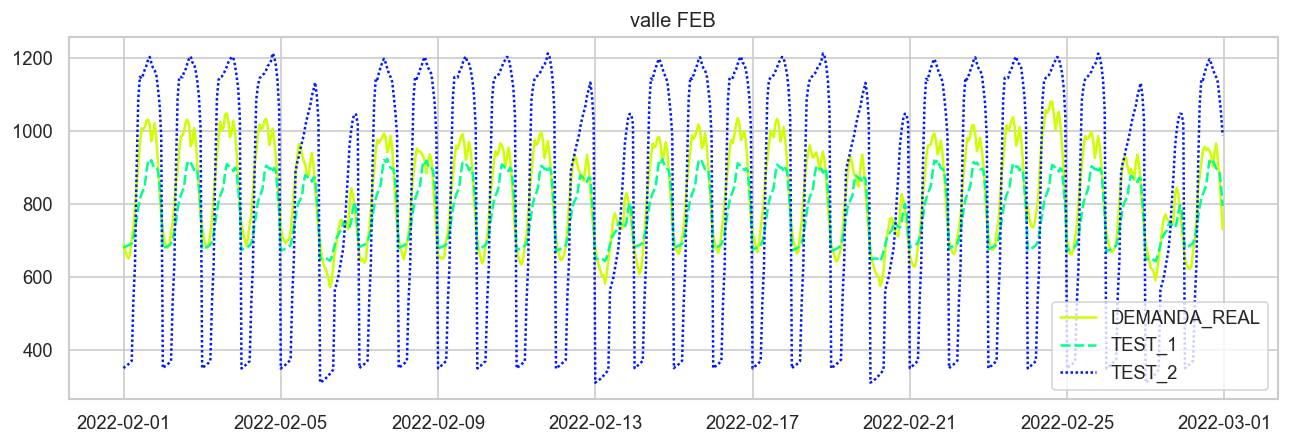

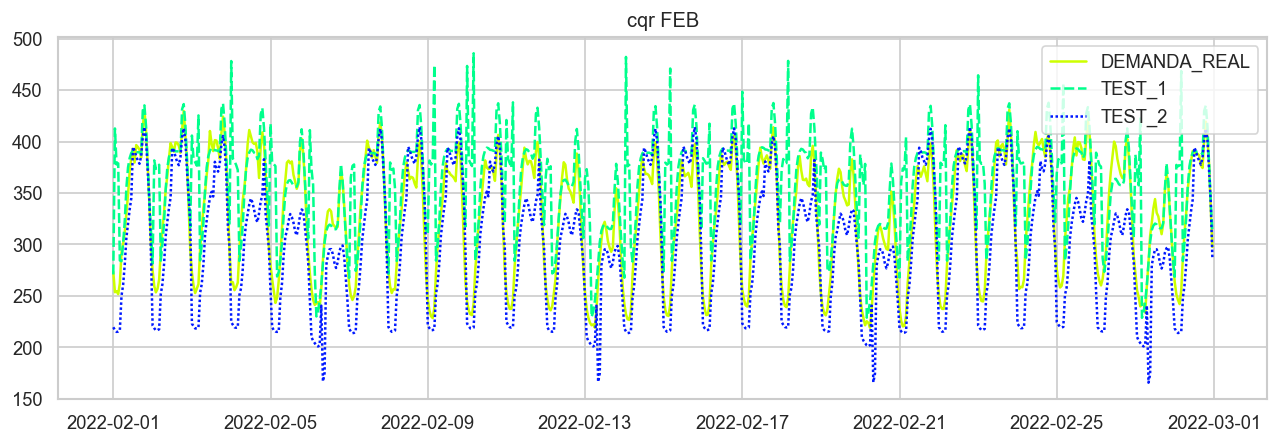

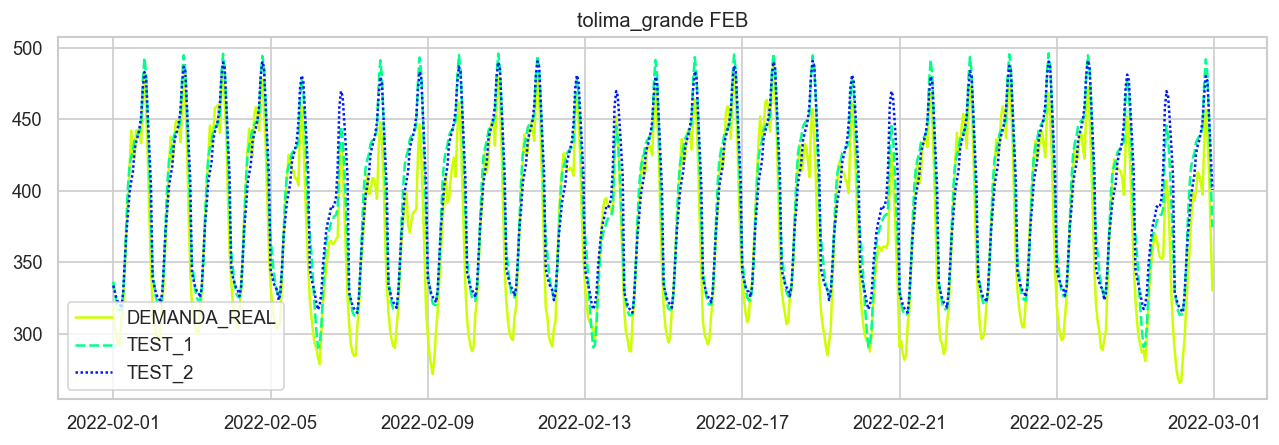

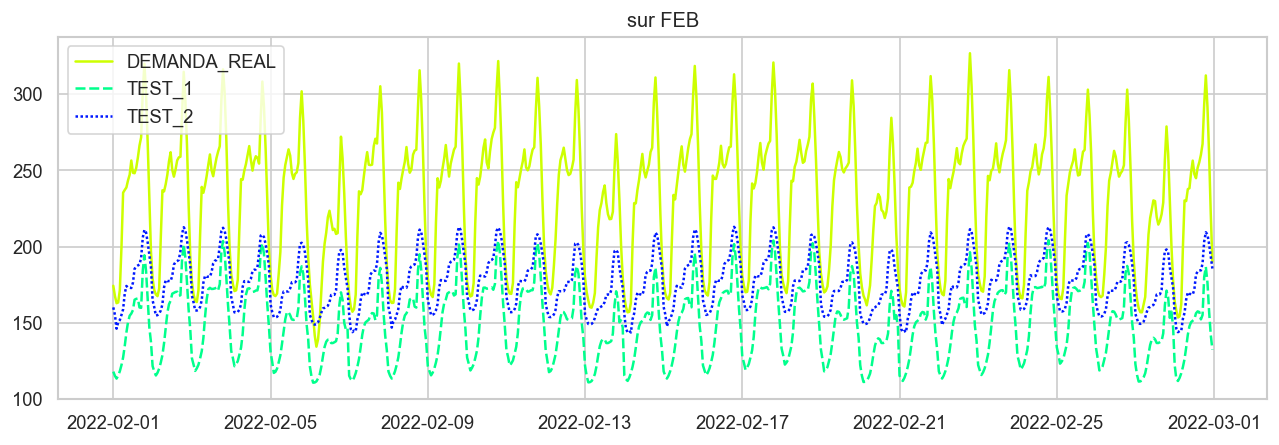

### MAR Predictions

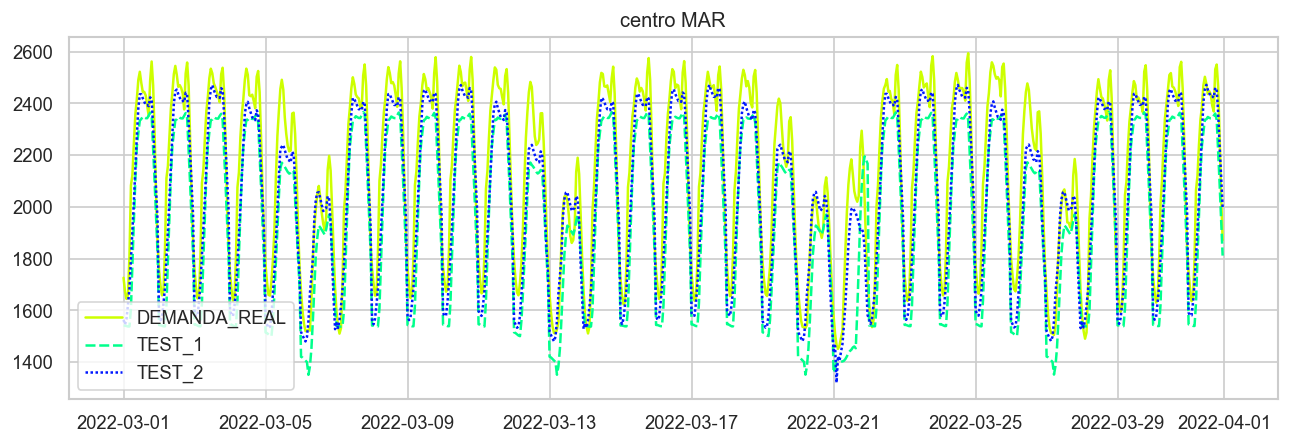

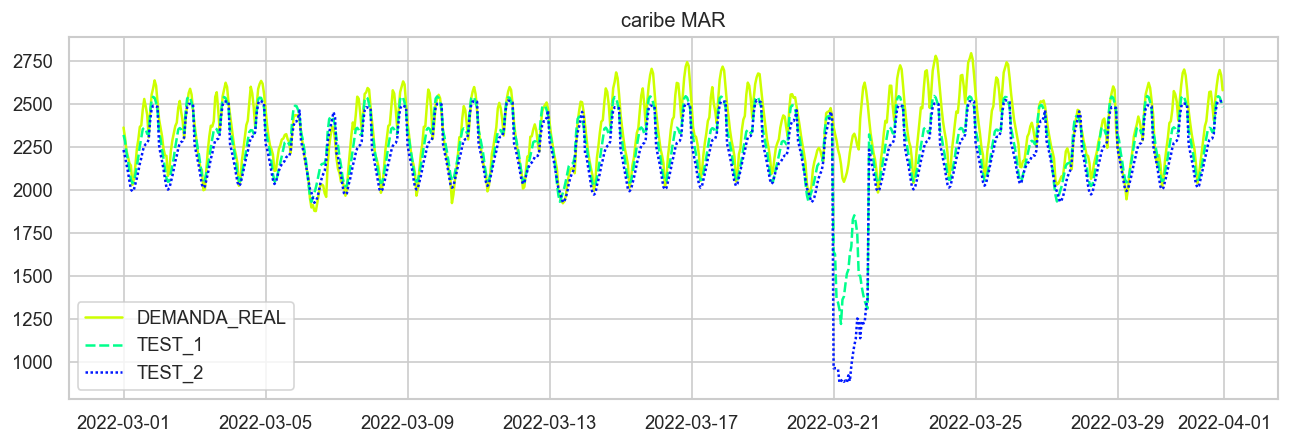

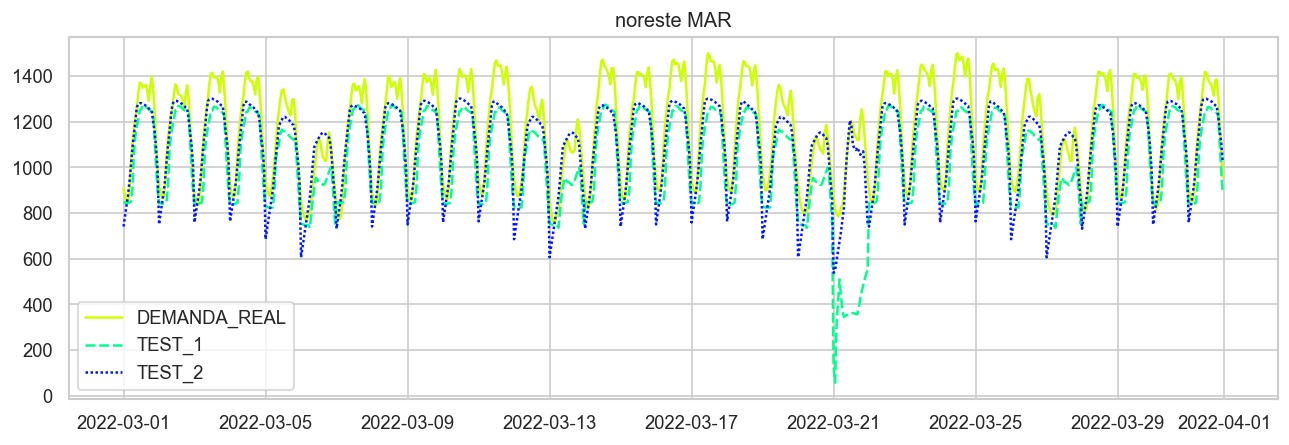

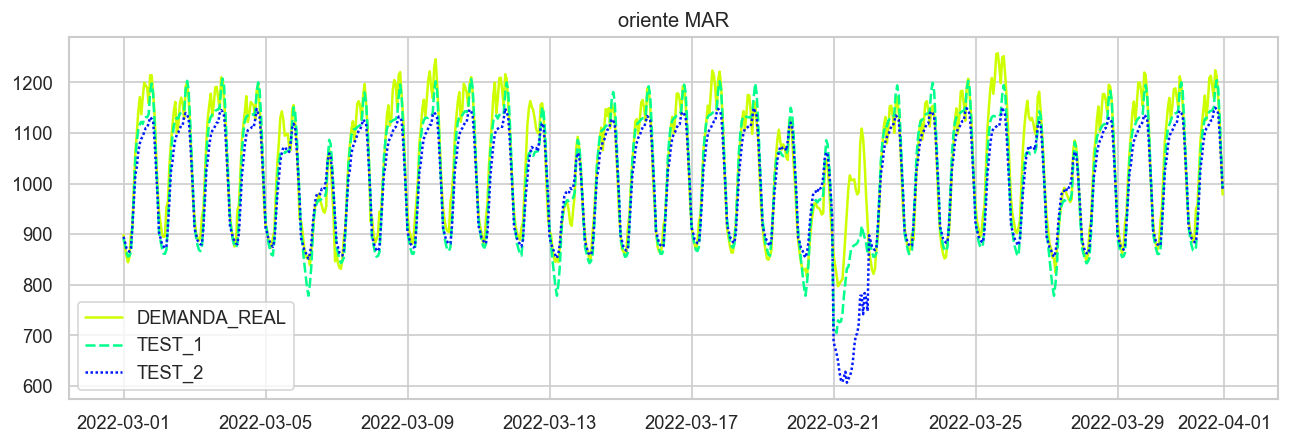

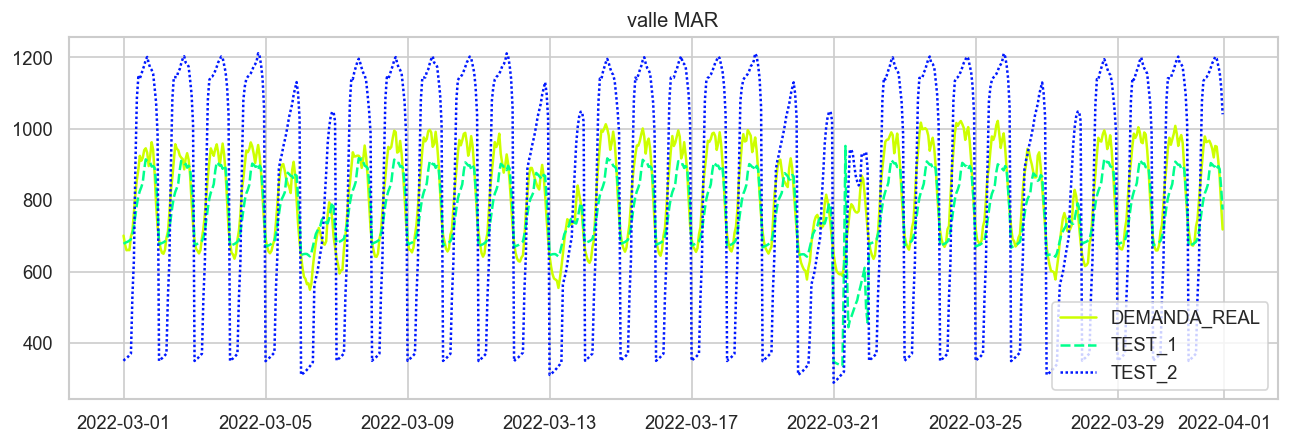

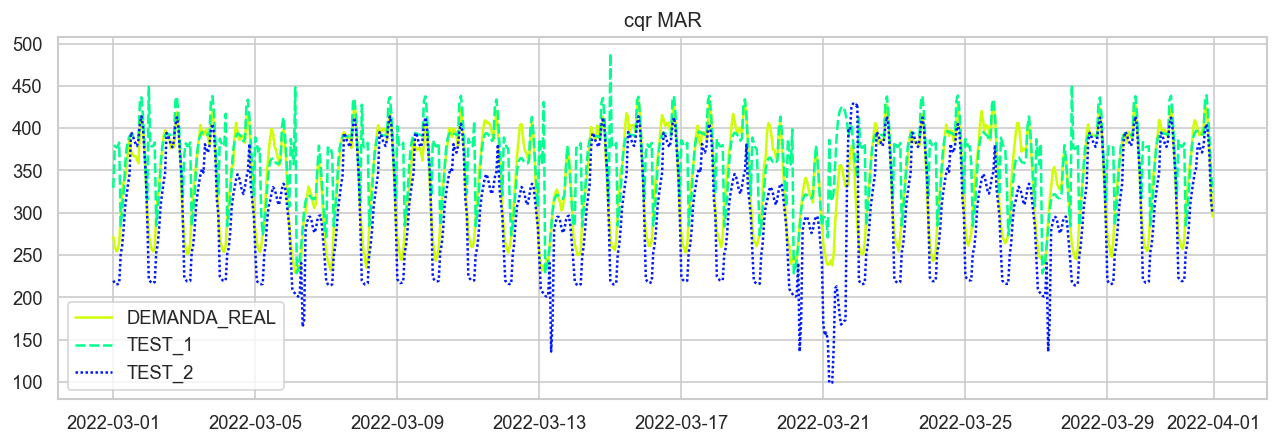

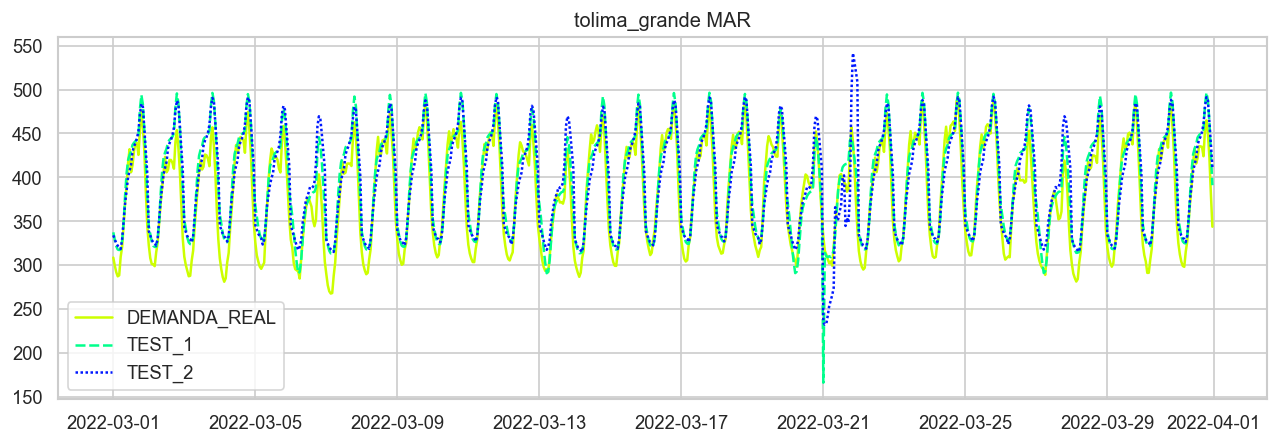

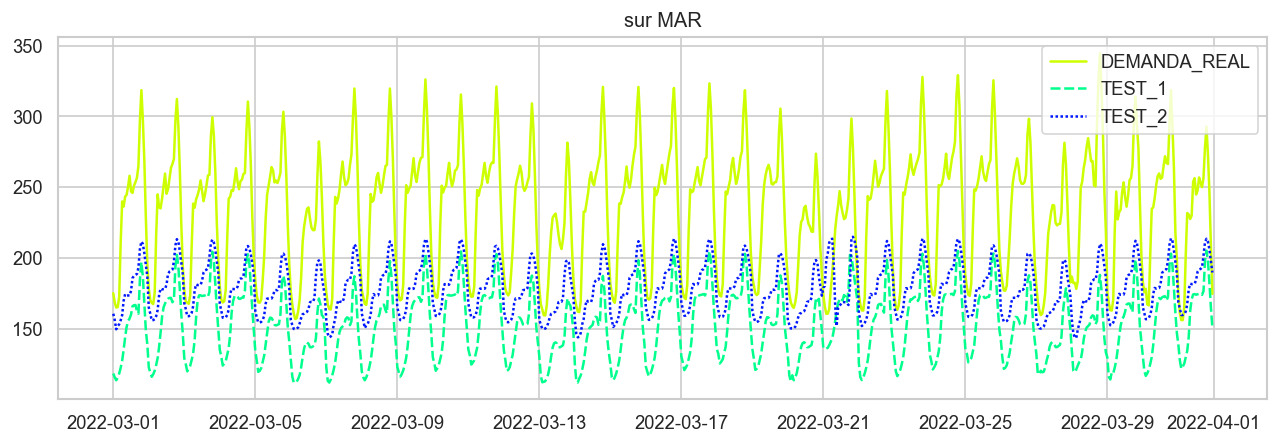

In [79]:
display(Markdown('### FEB Predictions'))
for area in areas_subareas['AREA'].unique():
    sns.set_theme(style="whitegrid")
    tmp_dataset = real_values.loc[(real_values["Fecha"] >= "2022-02-01")&(real_values["Fecha"] <= "2022-02-28")]
    subareas = areas_subareas.loc[areas_subareas['AREA'] == area,'SUBAREA'].tolist()
    sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
    test_1_demanda = test_training_1_predictions[subareas].head(tmp_dataset.shape[0]).sum(axis="columns")
    test_2_demanda = test_training_2_predictions[subareas].head(tmp_dataset.shape[0]).sum(axis="columns")
    dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
    data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_1': test_1_demanda.values, 'TEST_2': test_2_demanda.values})
    fig, ax = plt.subplots(figsize=(13,4),dpi=120)
    ax = sns.lineplot(data=data, palette="gist_rainbow", linewidth=1.5)
    ax.set_title(area + " FEB")
    plt.show()
display(Markdown('### MAR Predictions'))
for area in areas_subareas['AREA'].unique():
    sns.set_theme(style="whitegrid")
    tmp_dataset = real_values.loc[(real_values["Fecha"] >= "2022-03-01")&(real_values["Fecha"] <= "2022-03-31")]
    subareas = areas_subareas.loc[areas_subareas['AREA'] == area,'SUBAREA'].tolist()
    sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
    test_1_demanda = test_training_1_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
    test_2_demanda = test_training_2_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
    dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
    data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_1': test_1_demanda.values, 'TEST_2': test_2_demanda.values})
    fig, ax = plt.subplots(figsize=(13,4),dpi=120)
    ax = sns.lineplot(data=data, palette="gist_rainbow", linewidth=1.5)
    ax.set_title(area + " MAR")
    plt.show()

## Graph Pais

### FEB Pais

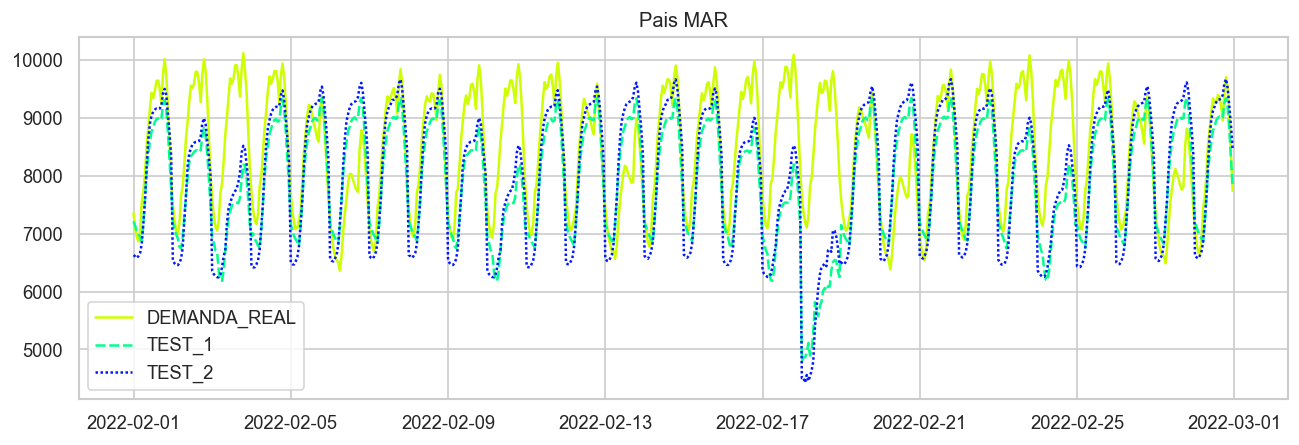

### MAR Pais

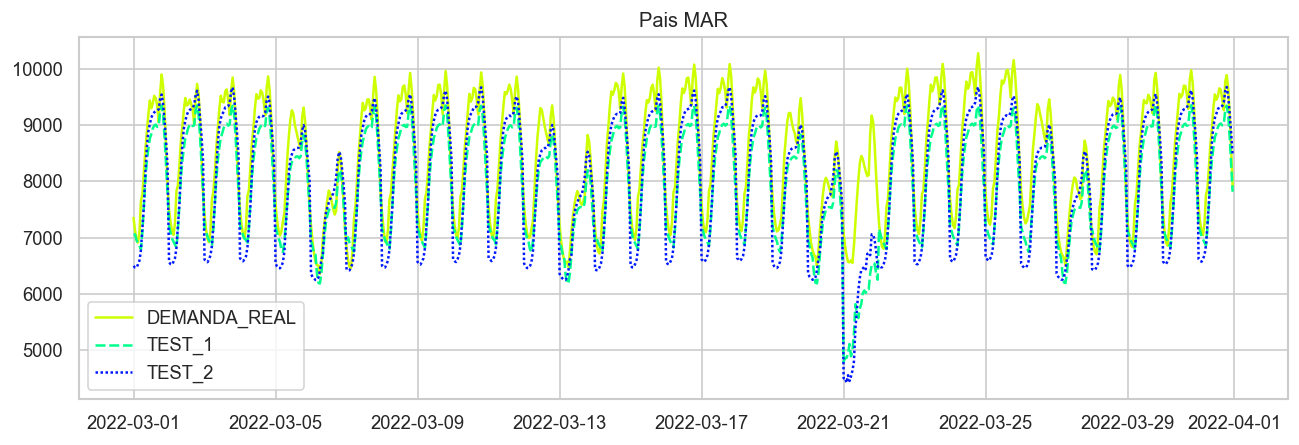

In [81]:
display(Markdown('### FEB Pais'))
sns.set_theme(style="whitegrid")
tmp_dataset = real_values.loc[(real_values["Fecha"] >= "2022-02-01")&(real_values["Fecha"] <= "2022-02-28")]
subareas = areas_subareas.SUBAREA.values.tolist()
sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
test_1_demanda = test_training_1_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
test_2_demanda = test_training_2_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_1': test_1_demanda.values, 'TEST_2': test_2_demanda.values})
fig, ax = plt.subplots(figsize=(13,4),dpi=120)
ax = sns.lineplot(data=data, palette="gist_rainbow", linewidth=1.5)
ax.set_title("Pais" + " MAR")
plt.show()
display(Markdown('### MAR Pais'))
sns.set_theme(style="whitegrid")
tmp_dataset = real_values.loc[(real_values["Fecha"] >= "2022-03-01")&(real_values["Fecha"] <= "2022-03-31")]
subareas = areas_subareas.SUBAREA.values.tolist()
sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
test_1_demanda = test_training_1_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
test_2_demanda = test_training_2_predictions[subareas].tail(tmp_dataset.shape[0]).sum(axis="columns")
dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_1': test_1_demanda.values, 'TEST_2': test_2_demanda.values})
fig, ax = plt.subplots(figsize=(13,4),dpi=120)
ax = sns.lineplot(data=data, palette="gist_rainbow", linewidth=1.5)
ax.set_title("Pais" + " MAR")
plt.show()

## Metrics By Subarea And Pais

In [88]:

tmp_dataset = real_values.loc[real_values["Fecha"] >= "2022-02-01"]
for subarea in set(areas_subareas["SUBAREA"].tolist()) - {"nariño"}:
    display(Markdown(f"### {subarea}"))
    display(Markdown("Test 1"))
    print("R^2:", r2_score(tmp_dataset[subarea].values, test_training_1_predictions[subarea].values))
    print("MAE:", mean_absolute_error(tmp_dataset[subarea].values, test_training_1_predictions[subarea].values))
    print("MSE:", mean_squared_error(tmp_dataset[subarea].values, test_training_1_predictions[subarea].values))
    display(Markdown("Test 2"))
    print("R^2:", r2_score(tmp_dataset[subarea].values, test_training_2_predictions[subarea].values))
    print("MAE:", mean_absolute_error(tmp_dataset[subarea].values, test_training_2_predictions[subarea].values))
    print("MSE:", mean_squared_error(tmp_dataset[subarea].values, test_training_2_predictions[subarea].values))
display(Markdown(f"### Pais"))
display(Markdown("Test 1"))
print("R^2:", r2_score(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_1_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))
print("MAE:", mean_absolute_error(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_1_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))
print("MSE:", mean_squared_error(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_1_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))
display(Markdown("Test 2"))
print("R^2:", r2_score(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_2_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))
print("MAE:", mean_absolute_error(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_2_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))
print("MSE:", mean_squared_error(tmp_dataset[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values, test_training_2_predictions[areas_subareas["SUBAREA"].tolist()].sum(axis="columns").values))

### tolima

Test 1

R^2: 0.4321136215631298
MAE: 18.69281790366911
MSE: 481.09279641796024


Test 2

R^2: 0.009426567358260418
MAE: 25.40095328572246
MSE: 839.1779779587188


### meta

Test 1

R^2: 0.1728227714997953
MAE: 24.117412601417183
MSE: 750.7745127845109


Test 2

R^2: 0.4511866028804685
MAE: 13.416218754383161
MSE: 498.1219219236843


### drummond

Test 1

R^2: -0.13935909624678722
MAE: 2.024560221195221
MSE: 6.3189554574154


Test 2

R^2: -1.529464880070345
MAE: 3.252150267532316
MSE: 14.028567429630654


### bolivar

Test 1

R^2: -1.3409924358304441
MAE: 21.10298507335943
MSE: 2867.0859518011403


Test 2

R^2: -1.9243010808381462
MAE: 34.43778468194131
MSE: 3581.48211817426


### santander

Test 1

R^2: 0.8759900125858596
MAE: 12.501512452968447
MSE: 389.771940100687


Test 2

R^2: 0.8841899046305353
MAE: 15.484180741566801
MSE: 363.999114076636


### cordobasucre

Test 1

R^2: 0.037587835072076525
MAE: 20.053183431844765
MSE: 1809.9758985276094


Test 2

R^2: 0.4822441787685775
MAE: 18.06011660925224
MSE: 973.7258026257667


### oxy

Test 1

R^2: -0.15568991652114494
MAE: 16.6213598717141
MSE: 356.22576259892406


Test 2

R^2: -0.15453601327071032
MAE: 9.403322694295246
MSE: 355.87008755194546


### cali

Test 1

R^2: 0.2934180513626522
MAE: 50.797109093328785
MSE: 5176.955400709245


Test 2

R^2: -4.550284276888867
MAE: 165.89645211169056
MSE: 40665.59330892119


### intercor

Test 1

R^2: -0.8554155385507669
MAE: 2.5659357462284387
MSE: 13.606423815055342


Test 2

R^2: -15.07885056563531
MAE: 7.9514043850044205
MSE: 117.9119451731326


### planeta

Test 1

R^2: 0.2699763619739365
MAE: 2.802873949968586
MSE: 15.818434947991884


Test 2

R^2: -1.6407599170271632
MAE: 4.8245481053789865
MSE: 57.22100872474385


### cerromatoso

Test 1

R^2: -0.2839095363195452
MAE: 30.067869004245907
MSE: 1574.6982417883007


Test 2

R^2: -0.7990409627787718
MAE: 42.44972256944624
MSE: 2206.5001940197344


### celsia

Test 1

R^2: 0.6900687979265968
MAE: 15.198873803659211
MSE: 423.87098583609713


Test 2

R^2: 0.7312561639451645
MAE: 14.15979041179075
MSE: 367.5419382233056


### norsantander

Test 1

R^2: 0.8056678418481404
MAE: 10.775577103795381
MSE: 186.43858829769948


Test 2

R^2: 0.47933591810062437
MAE: 15.822755352415212
MSE: 499.5152491991636


### guaviare

Test 1

R^2: 0.5826820531593758
MAE: 0.7264814734472933
MSE: 1.1445217007931652


Test 2

R^2: -218.3112246771054
MAE: 24.469016721446586
MSE: 601.4753445682346


### arauca

Test 1

R^2: 0.24403919469531765
MAE: 3.230566565652988
MSE: 15.744837829972662


Test 2

R^2: -0.1510267461204724
MAE: 3.996251416223447
MSE: 23.973107241087412


### caldas

Test 1

R^2: 0.7969051374051973
MAE: 10.591862696488377
MSE: 177.43962677965374


Test 2

R^2: 0.44790078137895606
MAE: 14.763822142604678
MSE: 482.3572494441001


### emec

Test 1

R^2: -37.322066384195125
MAE: 1.379483703326209
MSE: 1.953567746324391


Test 2

R^2: -138.4405707321831
MAE: 2.656571256027221
MSE: 7.108348458573841


### cartago

Test 1

R^2: -5.678156278439508
MAE: 7.265073192081117
MSE: 137.8312379178877


Test 2

R^2: -2413.720128941296
MAE: 178.16054291143342
MSE: 49837.68733770806


### putumayo

Test 1

R^2: 0.6769766828342683
MAE: 0.8483406333143159
MSE: 1.1719697686990547


Test 2

R^2: -126.70154322372079
MAE: 21.44036727229404
MSE: 463.3174762354074


### tuboscaribe

Test 1

R^2: -3.5595139346513385
MAE: 1.4787644661816097
MSE: 2.64149869776197


Test 2

R^2: -0.043525542645485915
MAE: 0.5338569419116219
MSE: 0.6045537751361625


### cirainfanta

Test 1

R^2: -0.2728867890007536
MAE: 1.84519586767854
MSE: 8.907197336099273


Test 2

R^2: -1.6029201201430663
MAE: 2.4878376891788117
MSE: 18.2142853241631


### bajoputumayo

Test 1

R^2: -2.813238032206355
MAE: 1.6299203562353535
MSE: 17.152722553827466


Test 2

R^2: -126.04287300958465
MAE: 23.81105951081805
MSE: 571.4647590236289


### pereira

Test 1

R^2: -9.700827566416027
MAE: 26.035577768432272
MSE: 2796.648264154017


Test 2

R^2: -0.1273911649715973
MAE: 10.620054594233453
MSE: 294.64230920192114


### cauca

Test 1

R^2: 0.4114696677780936
MAE: 11.54296819572147
MSE: 191.36534129961336


Test 2

R^2: 0.3309703007321333
MAE: 12.335373515833622
MSE: 217.54035387881999


### huila

Test 1

R^2: 0.8247202839239512
MAE: 8.010903352985718
MSE: 91.66510099288831


Test 2

R^2: 0.6093956932143431
MAE: 10.456870713794524
MSE: 204.27225711747343


### atlantico

Test 1

R^2: 0.509428454487971
MAE: 31.58702781294138
MSE: 1560.6352941563287


Test 2

R^2: -0.057378641021783805
MAE: 46.585094960061625
MSE: 3363.79564115014


### tulua

Test 1

R^2: -0.05615840476288869
MAE: 4.987998866916807
MSE: 31.967093486986055


Test 2

R^2: -3.013895000384754
MAE: 6.619231899452856
MSE: 121.4898789287692


### boyaca

Test 1

R^2: 0.646606605002488
MAE: 12.03906360580572
MSE: 220.1988203409094


Test 2

R^2: 0.38805571160453267
MAE: 13.916242291463742
MSE: 381.3014400565915


### quindio

Test 1

R^2: 0.6925774233282664
MAE: 6.409553873949733
MSE: 50.20027860370007


Test 2

R^2: -2.1183277668342715
MAE: 18.845297850850883
MSE: 509.2043803922997


### caqueta

Test 1

R^2: 0.15132705440936411
MAE: 5.831511599227129
MSE: 43.544368419568585


Test 2

R^2: -0.0555071440849233
MAE: 6.508305498703778
MSE: 54.15677757882765


### antioquia

Test 1

R^2: 0.29186091845174966
MAE: 146.60011668111167
MSE: 29275.543136892986


Test 2

R^2: 0.6883743101827571
MAE: 96.83628042458399
MSE: 12883.078426998405


### codensa

Test 1

R^2: 0.5504884874427245
MAE: 187.818973067758
MSE: 44260.23508883607


Test 2

R^2: 0.8018412360044297
MAE: 118.06358141289837
MSE: 19511.298897466182


### rubiales

Test 1

R^2: -4.333215709498174
MAE: 10.493591354533912
MSE: 302.5199913702508


Test 2

R^2: -3.16117859922299
MAE: 12.60973350144726
MSE: 236.0376520464163


### choco

Test 1

R^2: 0.6568970724798173
MAE: 1.8472239808891857
MSE: 7.1051678648996335


Test 2

R^2: -0.6633370422737401
MAE: 4.656961196083888
MSE: 34.44531641475248


### gcm

Test 1

R^2: 0.6452414511062099
MAE: 27.02032083982306
MSE: 1432.2784524593242


Test 2

R^2: -0.08152334969342134
MAE: 30.295194451111183
MSE: 4366.470080644286


### casanare

Test 1

R^2: 0.537198823193016
MAE: 4.614393136946684
MSE: 39.802212232665724


Test 2

R^2: -17.18459398781481
MAE: 38.48296397578353
MSE: 1563.9265964306853


### Pais

Test 1

R^2: 0.6652478590787201
MAE: 496.7956672861245
MSE: 347234.5141702955


Test 2

R^2: 0.7130656980214354
MAE: 446.89196642344746
MSE: 297633.62430518266


In [106]:
test_training_1_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_1_predictions["Hora"] = tmp_dataset["Hora"].tolist()
test_training_2_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_2_predictions["Hora"] = tmp_dataset["Hora"].tolist()

In [135]:
demand_real = pd.melt(tmp_dataset, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)

In [136]:
demand_test_1 = pd.melt(test_training_1_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)

In [137]:
demand_test_2 = pd.melt(test_training_2_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)

## Dataset 20170101-2022-01-31 -  Prediction: 2 Months

In [138]:
display(Markdown("Test 1 - regression_lstm_relu_short"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
display(Markdown("Test 2 - regression_lstm_relu"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))

Test 1

R^2: 0.9781166894933065
MAE: 22.579686891835433
MSE: 2813.0400445521927


Test 2

R^2: 0.9672744863015729
MAE: 31.45949577750616
MSE: 4206.775774810627


### Excluding nariño

In [139]:
demand_real = demand_real.loc[demand_real["REGION"] != "nariño"]
demand_test_1 = demand_test_1.loc[demand_test_1["REGION"] != "nariño"]
demand_test_2 = demand_test_2.loc[demand_test_2["REGION"] != "nariño"]
display(Markdown("Test 1 - regression_lstm_relu_short"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_1["DEMANDA"].values))
display(Markdown("Test 2 - regression_lstm_relu"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_2["DEMANDA"].values))

Test 1

R^2: 0.9800051866490943
MAE: 20.587693981912306
MSE: 2631.1202690145515


Test 2

R^2: 0.9691194879025488
MAE: 29.714164225518342
MSE: 4063.5708806690523


## Dataset - 20170101-20210930 - Prediction : 6 Months

In [13]:
tmp_dataset = real_values.loc[real_values["Fecha"] >= "2021-10-01"]
demand_real = pd.melt(tmp_dataset, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
test_training_5_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_5_predictions["Hora"] = tmp_dataset["Hora"].tolist()
test_training_6_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_6_predictions["Hora"] = tmp_dataset["Hora"].tolist()
demand_test_5 = pd.melt(test_training_5_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
demand_test_6 = pd.melt(test_training_6_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
display(Markdown("Test 5 - regression_lstm_relu_short"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_5["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_5["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_5["DEMANDA"].values))
display(Markdown("Test 6 - regression_lstm_relu"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_6["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_6["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_6["DEMANDA"].values))

Test 5 - regression_lstm_relu_short

R^2: 0.9598020063287885
MAE: 24.329566264560963
MSE: 5000.690732254534


Test 6 - regression_lstm_relu

R^2: 0.9631876036118325
MAE: 38.502827264972694
MSE: 4579.517349947423


## Dataset - 20170101-20210331 - Prediction: 1 year

In [12]:
tmp_dataset = real_values.loc[real_values["Fecha"] >= "2021-04-01"]
demand_real = pd.melt(tmp_dataset, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
test_training_7_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_7_predictions["Hora"] = tmp_dataset["Hora"].tolist()
test_training_8_predictions["Fecha"] = tmp_dataset["Fecha"].tolist()
test_training_8_predictions["Hora"] = tmp_dataset["Hora"].tolist()
demand_test_7 = pd.melt(test_training_7_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
demand_test_8 = pd.melt(test_training_8_predictions, id_vars=["Fecha", "Hora"], value_vars=set(real_values.columns[2:]) - {"cundinamarca"}).rename(columns={"variable": "REGION", "value": "DEMANDA"}).sort_values(by=["Fecha", "REGION", "Hora"]).fillna(0)
display(Markdown("Test 7 - regression_lstm_relu_short "))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_7["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_7["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_7["DEMANDA"].values))
display(Markdown("Test 8 - regression_lstm_relu_short - 31 Features"))
print("R^2:", r2_score(demand_real["DEMANDA"].values, demand_test_8["DEMANDA"].values))
print("MAE:", mean_absolute_error(demand_real["DEMANDA"].values, demand_test_8["DEMANDA"].values))
print("MSE:", mean_squared_error(demand_real["DEMANDA"].values, demand_test_8["DEMANDA"].values))

Test 7 - regression_lstm_relu_short 

R^2: 0.9342861044671102
MAE: 43.02618989548653
MSE: 7992.351972107809


Test 8 - regression_lstm_relu_short - 31 Features

R^2: 0.9578845325485867
MAE: 35.54739326672578
MSE: 5122.229273001721


## Graphics all models - Pais

### Dataset - 20170101-20210930 - Prediction: 6 Months

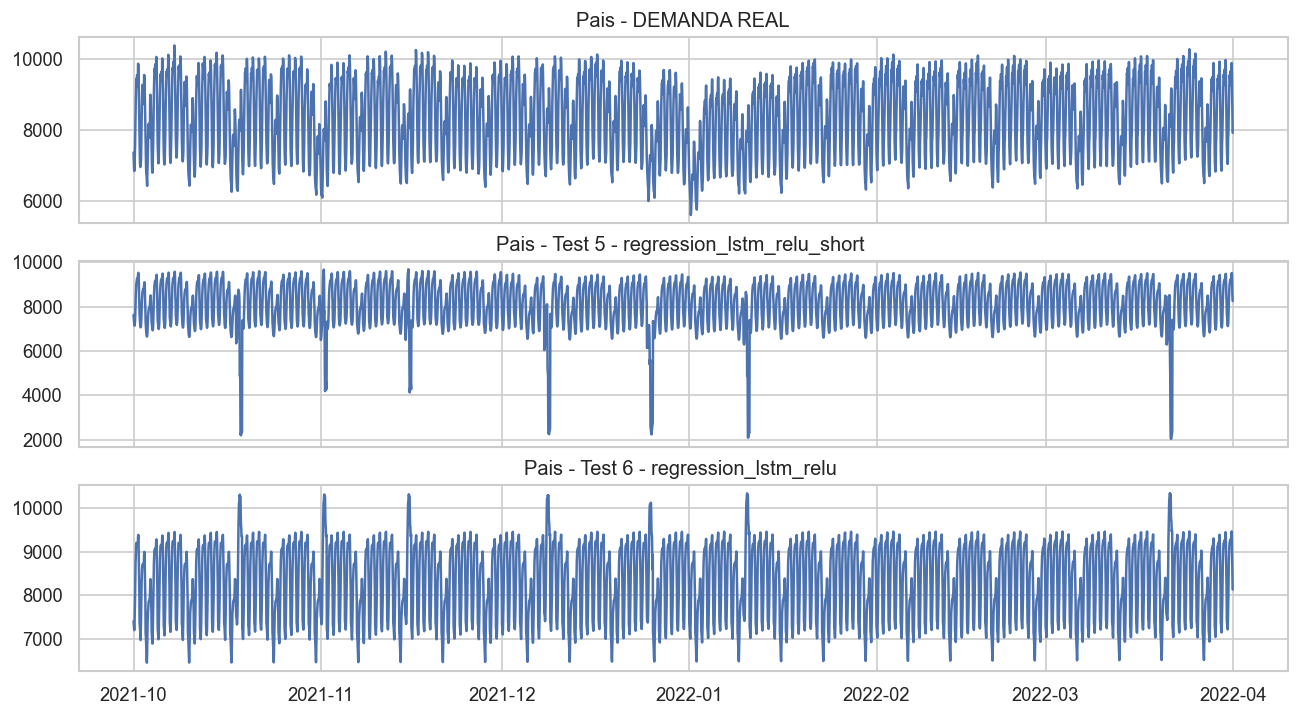

In [29]:
sns.set_theme(style="whitegrid")
tmp_dataset = real_values.loc[real_values["Fecha"] >= "2021-10-01"]
subareas = areas_subareas.SUBAREA.values.tolist()
sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
test_5_demanda = test_training_5_predictions[subareas].sum(axis="columns")
test_6_demanda = test_training_6_predictions[subareas].sum(axis="columns")
dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_5': test_5_demanda.values, 'TEST_6': test_6_demanda.values})
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(13,7),dpi=120)
display(Markdown("### Dataset - 20170101-20210930 - Prediction: 6 Months"))
sns.lineplot(x=data.index, y=data["DEMANDA_REAL"].values, ax=ax[0])
ax[0].set_title("Pais - DEMANDA REAL")

sns.lineplot(x=data.index, y=data["TEST_5"].values, ax=ax[1])
ax[1].set_title("Pais - Test 5 - regression_lstm_relu_short ")

sns.lineplot(x=data.index, y=data["TEST_6"].values, ax=ax[2])
ax[2].set_title("Pais - Test 6 - regression_lstm_relu ")

plt.show()

### Dataset - 20170101-20210331 - Prediction: 1 year

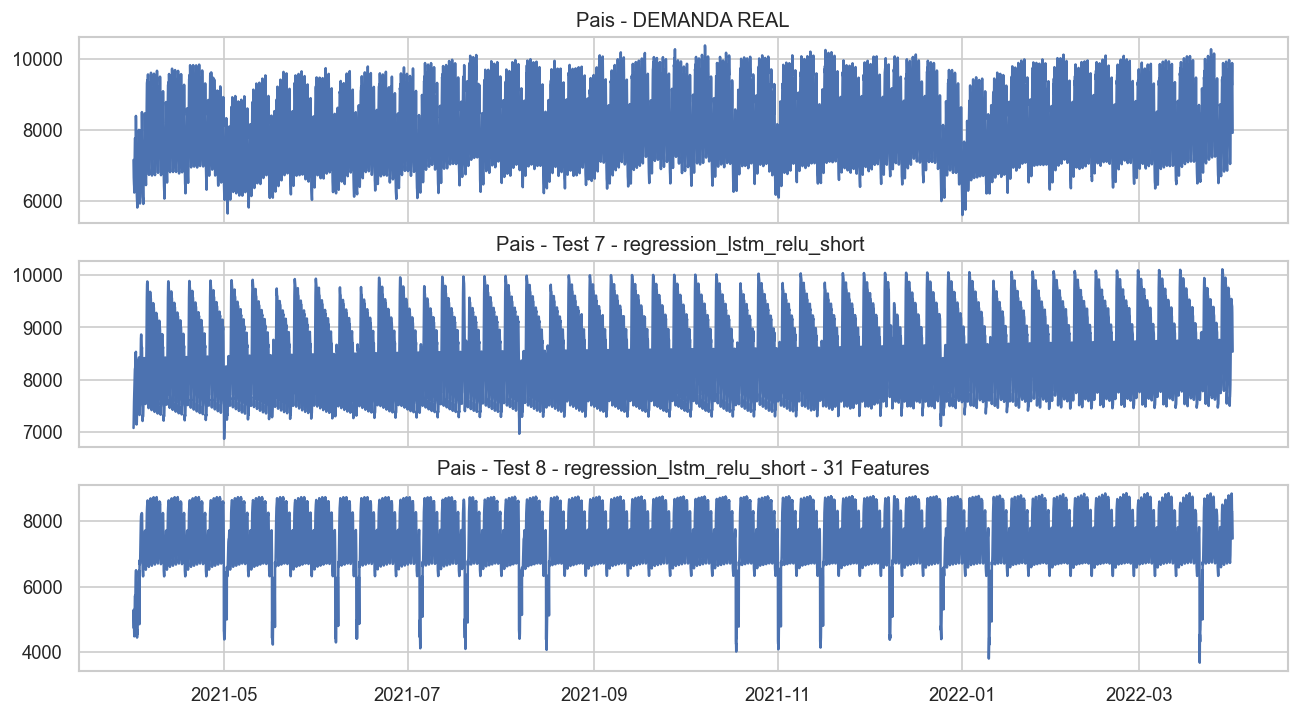

In [27]:
sns.set_theme(style="whitegrid")
tmp_dataset = real_values.loc[real_values["Fecha"] >= "2021-04-01"]
subareas = areas_subareas.SUBAREA.values.tolist()
sum_by_area = tmp_dataset[["Fecha", "Hora"] + subareas].sort_values(by=["Fecha", "Hora"])[subareas].sum(axis="columns")
test_7_demanda = test_training_7_predictions[subareas].sum(axis="columns")
test_8_demanda = test_training_8_predictions[subareas].sum(axis="columns")
dates = pd.to_datetime(tmp_dataset.Fecha.map(lambda x: x.strftime("%Y-%m-%d")) + " " + tmp_dataset.Hora.map(lambda x : f"{x-1:02d}"), format='%Y-%m-%d %H')
data = pd.DataFrame(index=dates, data={'DEMANDA_REAL': sum_by_area.values, 'TEST_7': test_7_demanda.values, 'TEST_8': test_8_demanda.values})
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(13,7),dpi=120)
display(Markdown("### Dataset - 20170101-20210331 - Prediction: 1 year"))
sns.lineplot(x=data.index, y=data["DEMANDA_REAL"].values, ax=ax[0])
ax[0].set_title("Pais - DEMANDA REAL")

sns.lineplot(x=data.index, y=data["TEST_7"].values, ax=ax[1])
ax[1].set_title("Pais - Test 7 - regression_lstm_relu_short ")

sns.lineplot(x=data.index, y=data["TEST_8"].values, ax=ax[2])
ax[2].set_title("Pais - Test 8 - regression_lstm_relu_short - 31 Features")

plt.show()